In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset

data = pd.read_csv("BankChurners.csv")

print(data.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [3]:
# load columns name
print(data.columns.to_list())

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [4]:
print(data.dtypes)

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [5]:
# drop non numberical column 
data = data.drop('CLIENTNUM', axis=1)

In [6]:
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

data = data[numerical_columns]

# filling missing value with means 

data = data.fillna(data.mean())

print(data.head())


   Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  
0                  777             1144              42  
1                 

In [7]:
print(data.dtypes)

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object


In [8]:
X = data[['Total_Revolving_Bal','Total_Trans_Amt','Credit_Limit']].values

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [9]:
#using wards method for linkage

linkage_matrix = linkage(X_scaler,method='ward') 

Text(0, 0.5, 'data\xa0point')

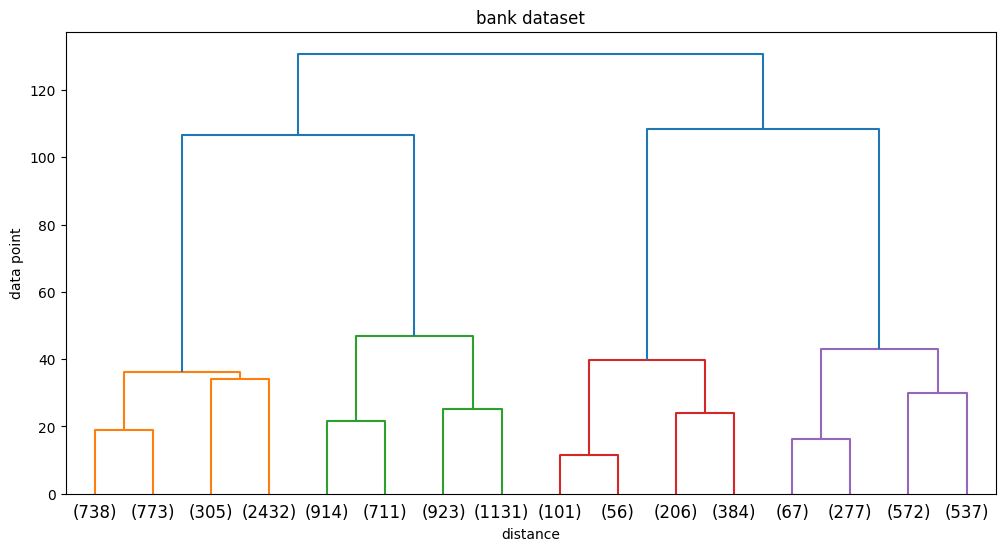

In [10]:
# design a plot 
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix,truncate_mode='level', p = 3)
plt.title("bank dataset")
plt.xlabel("distance")
plt.ylabel("data point")

In [25]:
# choose 3 clusters 
model = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = model.fit_predict(X_scaler)

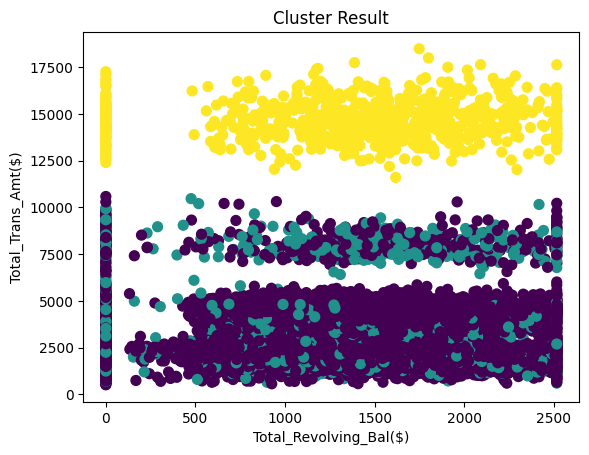

point each cluster [7927 1453  747]


In [26]:
#Total _Revolving_Bal  ","
plt.Figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',s=50)
plt.title("Cluster Result")
plt.xlabel("Total_Revolving_Bal($)")
plt.ylabel("Total_Trans_Amt($)")
plt.show()
print("point each cluster",np.bincount(labels))